In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/Japen_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Country/Region', 'Lat', 'Long', '2001/1/21', '2001/2/21', '2001/3/21',
       '2001/4/21', '2001/5/21', '2001/6/21', '2001/7/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=102)

In [3]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Country/Region','Lat','Long'],axis=1)

In [4]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

       0       1       2       3       4       5       6       7       8   \
0  239068  242097  245293  248625  253571  259521  267084  274947  282737   

       9   ...      89      90      91      92      93      94      95  \
0  288818  ...  474641  477239  479953  482704  485226  486792  489407   

       96      97      98  
0  492860  496351  499831  

[1 rows x 99 columns]


In [5]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    

print(ay.shape)
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/Japen_deffirence.csv',index_col=None,names=range(1,100))
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/Japen_deffirence.csv", ay, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/Japen_deffirence.csv',index_col=None)

(99, 1)


In [6]:
print(traindata)
traindata.shape

    3.029000000000000000e+03
0                     3196.0
1                     3332.0
2                     4946.0
3                     5950.0
4                     7563.0
..                       ...
93                    2615.0
94                    3453.0
95                    3491.0
96                    3480.0
97                       0.0

[98 rows x 1 columns]


(98, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(x_data)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[3196.],
        [3332.],
        [4946.],
        [5950.],
        [7563.],
        [7863.],
        [7790.],
        [6081.],
        [4928.],
        [4575.],
        [5819.],
        [6594.],
        [7137.],
        [7071.],
        [5773.],
        [4890.],
        [5384.],
        [5519.],
        [5621.],
        [5045.],
        [4754.],
        [3971.],
        [2785.],
        [3861.],
        [3937.],
        [4162.],
        [3536.],
        [3319.],
        [2667.],
        [1790.],
        [2313.],
        [2631.],
        [2592.],
        [2366.],
        [2270.],
        [1637.],
        [1227.],
        [1558.],
        [1884.],
        [1691.],
        [1316.],
        [1362.],
        [1351.],
        [ 973.],
        [1308.],
        [1461.],
        [1525.],
        [1297.],
        [1234.],
        [1036.],
        [ 737.],
        [1103.],
        [ 904.],
        [1084.],
        [1057.],
        [1220.],
        [ 997.],
        [ 688.]]),
 array([[ 92

In [8]:
print(y_data.shape)

(48, 1)


In [9]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 50)            7950      
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense (Dense)                (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 4s 849ms/step - loss: 0.0828 - mae: 0.2118 - val_loss: 0.1167 - val_mae: 0.3057
Epoch 2/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0367 - mae: 0.1497 - val_loss: 0.1660 - val_mae: 0.3826
Epoch 3/600
5/5 [==============================] - 0s 45ms/step - loss: 0.0240 - mae: 0.1057 - val_loss: 0.1842 - val_mae: 0.4070
Epoch 4/600
5/5 [==============================] - 0s 55ms/step - loss: 0.0248 - mae: 0.1061 - val_loss: 0.1219 - val_mae: 0.3170
Epoch 5/600
5/5 [==============================] - 0s 59ms/step - loss: 0.0222 - mae: 0.0975 - val_loss: 0.0679 - val_mae: 0.2136
Epoch 6/600
5/5 [==============================] - 0s 52ms/step - loss: 0.0175 - mae: 0.0877 - val_loss: 0.0698 - val_mae: 0.2192
Epoch 7/600
5/5 [==============================] - 0s 53ms/step - loss: 0.0144 - mae: 0.0830 - val_loss: 0.1281 - val_mae: 0.3295
Epoch 8/600
5/5 [==============================] - 0s 49ms/step - loss: 0.0298 - mae: 0.1

5/5 [==============================] - 0s 30ms/step - loss: 0.0085 - mae: 0.0613 - val_loss: 0.1321 - val_mae: 0.3401
Epoch 64/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0096 - mae: 0.0648 - val_loss: 0.0651 - val_mae: 0.2178
Epoch 65/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0096 - mae: 0.0682 - val_loss: 0.0722 - val_mae: 0.2322
Epoch 66/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0092 - mae: 0.0634 - val_loss: 0.1832 - val_mae: 0.4094
Epoch 67/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0118 - mae: 0.0758 - val_loss: 0.0914 - val_mae: 0.2715
Epoch 68/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0079 - mae: 0.0653 - val_loss: 0.1166 - val_mae: 0.3156
Epoch 69/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0093 - mae: 0.0655 - val_loss: 0.1153 - val_mae: 0.3138
Epoch 70/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0076 - mae: 0.0612 - 

5/5 [==============================] - 0s 32ms/step - loss: 0.0066 - mae: 0.0572 - val_loss: 0.0908 - val_mae: 0.2687
Epoch 126/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0095 - mae: 0.0682 - val_loss: 0.1174 - val_mae: 0.3148
Epoch 127/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0084 - mae: 0.0649 - val_loss: 0.0755 - val_mae: 0.2400
Epoch 128/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0077 - mae: 0.0570 - val_loss: 0.0804 - val_mae: 0.2492
Epoch 129/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0109 - mae: 0.0721 - val_loss: 0.1138 - val_mae: 0.3099
Epoch 130/600
5/5 [==============================] - 0s 44ms/step - loss: 0.0079 - mae: 0.0609 - val_loss: 0.0920 - val_mae: 0.2713
Epoch 131/600
5/5 [==============================] - 0s 46ms/step - loss: 0.0070 - mae: 0.0550 - val_loss: 0.0890 - val_mae: 0.2654
Epoch 132/600
5/5 [==============================] - 0s 63ms/step - loss: 0.0070 - mae: 0.

Epoch 187/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0057 - mae: 0.0549 - val_loss: 0.1238 - val_mae: 0.3228
Epoch 188/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0092 - mae: 0.0683 - val_loss: 0.1626 - val_mae: 0.3810
Epoch 189/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0078 - mae: 0.0612 - val_loss: 0.1147 - val_mae: 0.3089
Epoch 190/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0064 - mae: 0.0574 - val_loss: 0.0769 - val_mae: 0.2408
Epoch 191/600
5/5 [==============================] - 0s 39ms/step - loss: 0.0073 - mae: 0.0608 - val_loss: 0.1255 - val_mae: 0.3254
Epoch 192/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0055 - mae: 0.0553 - val_loss: 0.0938 - val_mae: 0.2720
Epoch 193/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0059 - mae: 0.0518 - val_loss: 0.1435 - val_mae: 0.3522
Epoch 194/600
5/5 [==============================] - 0s 34ms/step - loss: 0.

5/5 [==============================] - 0s 30ms/step - loss: 0.0048 - mae: 0.0471 - val_loss: 0.1210 - val_mae: 0.3130
Epoch 250/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0043 - mae: 0.0481 - val_loss: 0.1278 - val_mae: 0.3227
Epoch 251/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0055 - mae: 0.0572 - val_loss: 0.1139 - val_mae: 0.2980
Epoch 252/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0048 - mae: 0.0484 - val_loss: 0.1339 - val_mae: 0.3325
Epoch 253/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0056 - mae: 0.0541 - val_loss: 0.1183 - val_mae: 0.3091
Epoch 254/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0063 - mae: 0.0559 - val_loss: 0.1210 - val_mae: 0.3124
Epoch 255/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0066 - mae: 0.0580 - val_loss: 0.0650 - val_mae: 0.2074
Epoch 256/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0045 - mae: 0.

5/5 [==============================] - 0s 28ms/step - loss: 0.0043 - mae: 0.0477 - val_loss: 0.1265 - val_mae: 0.3116
Epoch 312/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0054 - mae: 0.0509 - val_loss: 0.1219 - val_mae: 0.3031
Epoch 313/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0045 - mae: 0.0478 - val_loss: 0.0877 - val_mae: 0.2343
Epoch 314/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0034 - mae: 0.0461 - val_loss: 0.0762 - val_mae: 0.2066
Epoch 315/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0026 - mae: 0.0387 - val_loss: 0.1272 - val_mae: 0.3154
Epoch 316/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0032 - mae: 0.0442 - val_loss: 0.0674 - val_mae: 0.1921
Epoch 317/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0048 - mae: 0.0532 - val_loss: 0.0977 - val_mae: 0.2554
Epoch 318/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0030 - mae: 0.

5/5 [==============================] - 0s 32ms/step - loss: 0.0041 - mae: 0.0461 - val_loss: 0.0980 - val_mae: 0.2490
Epoch 374/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0733 - val_mae: 0.1999
Epoch 375/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0028 - mae: 0.0394 - val_loss: 0.1039 - val_mae: 0.2586
Epoch 376/600
5/5 [==============================] - 0s 39ms/step - loss: 0.0034 - mae: 0.0436 - val_loss: 0.0879 - val_mae: 0.2254
Epoch 377/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0032 - mae: 0.0437 - val_loss: 0.0986 - val_mae: 0.2497
Epoch 378/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0985 - val_mae: 0.2464
Epoch 379/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0030 - mae: 0.0430 - val_loss: 0.0929 - val_mae: 0.2283
Epoch 380/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0024 - mae: 0.

5/5 [==============================] - 0s 38ms/step - loss: 0.0024 - mae: 0.0390 - val_loss: 0.1012 - val_mae: 0.2406
Epoch 436/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0030 - mae: 0.0423 - val_loss: 0.1365 - val_mae: 0.3159
Epoch 437/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0024 - mae: 0.0392 - val_loss: 0.1024 - val_mae: 0.2551
Epoch 438/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0025 - mae: 0.0378 - val_loss: 0.1212 - val_mae: 0.2935
Epoch 439/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0035 - mae: 0.0461 - val_loss: 0.0921 - val_mae: 0.2342
Epoch 440/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0028 - mae: 0.0396 - val_loss: 0.1138 - val_mae: 0.2832
Epoch 441/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0033 - mae: 0.0428 - val_loss: 0.1460 - val_mae: 0.3353
Epoch 442/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0026 - mae: 0.

5/5 [==============================] - 0s 31ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.1053 - val_mae: 0.2549
Epoch 498/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0038 - mae: 0.0463 - val_loss: 0.1199 - val_mae: 0.2887
Epoch 499/600
5/5 [==============================] - 0s 38ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.1023 - val_mae: 0.2509
Epoch 500/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0027 - mae: 0.0357 - val_loss: 0.1076 - val_mae: 0.2596
Epoch 501/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0035 - mae: 0.0435 - val_loss: 0.1388 - val_mae: 0.3233
Epoch 502/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0030 - mae: 0.0442 - val_loss: 0.1041 - val_mae: 0.2545
Epoch 503/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0026 - mae: 0.0390 - val_loss: 0.1037 - val_mae: 0.2568
Epoch 504/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0026 - mae: 0.

5/5 [==============================] - 0s 32ms/step - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0950 - val_mae: 0.2335
Epoch 560/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0028 - mae: 0.0391 - val_loss: 0.0921 - val_mae: 0.2291
Epoch 561/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0018 - mae: 0.0313 - val_loss: 0.1235 - val_mae: 0.2914
Epoch 562/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0024 - mae: 0.0368 - val_loss: 0.0812 - val_mae: 0.2105
Epoch 563/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0036 - mae: 0.0471 - val_loss: 0.1122 - val_mae: 0.2724
Epoch 564/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0019 - mae: 0.0340 - val_loss: 0.1287 - val_mae: 0.3067
Epoch 565/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0039 - mae: 0.0422 - val_loss: 0.1415 - val_mae: 0.3297
Epoch 566/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0035 - mae: 0.

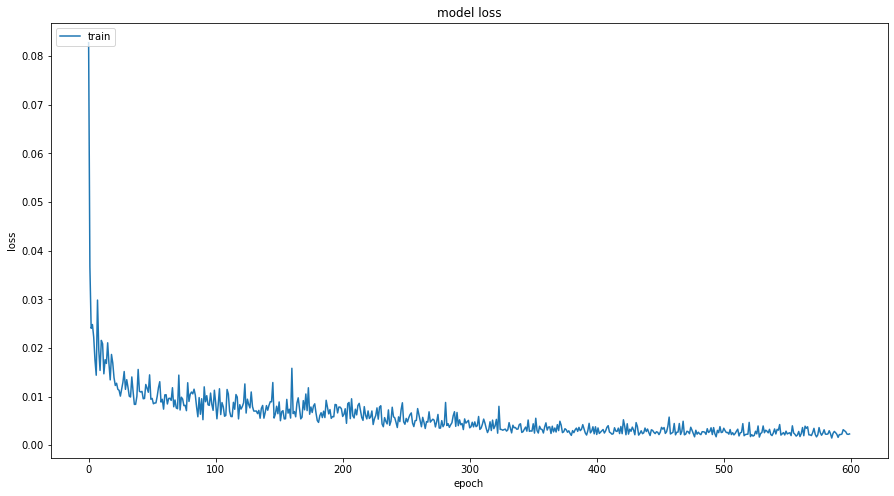

In [10]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [11]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 0s/step - loss: 0.1434 - mae: 0.3461
score is: test_loss 0.143419, mae 0.346108


In [12]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



0.38239166
0.39563933
0.4035429
0.42102948
0.44749755
0.4907194
0.5310236
0.6532226
0.6878482
0.6503264
The predicted perday spread from  2004/3/21 is
[[1334.9293]
 [1381.1769]
 [1408.7683]
 [1469.814 ]
 [1562.214 ]
 [1713.1014]
 [1853.8035]
 [2280.4001]
 [2401.278 ]
 [2270.2893]]


In [13]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(actual)


[[2598.]
 [2714.]
 [2751.]
 [2522.]
 [1566.]
 [2615.]
 [3453.]
 [3491.]
 [3480.]
 [   0.]]


MSE = 0.11196286325751616
R-Squared Score = -3.024884034947797


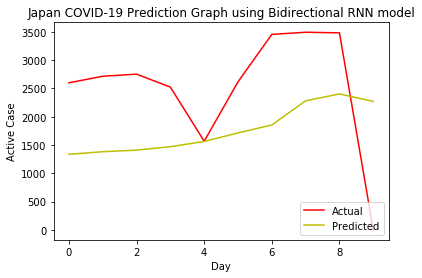

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('Japan COVID-19 Prediction Graph using Bidirectional RNN model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)